In [120]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [121]:

def read(indir):
    df = pd.read_csv(os.path.join(indir, "losses.txt"), sep="\t", header=0)
    df["dropout"] = list(zip(df["distribution"].str.split("_").str[1], df["distribution"].str.split("_").apply(len) == 3))
    df["model"] = df["distribution"]
    df["model"] = df["model"].str.replace("static", "baseline")
    df["distribution"] = df["model"].str.split("_").str[0]
    df = df.set_index("model").sort_index()
    df["n_genes"] = df.index.str.split("_").str[1].str[1:].astype(int)
    return df

def plot(df, var, path=None, figsize=(6,4), dpi=150, legend=False):
    f, ax = plt.subplots(figsize=figsize, dpi=dpi)
    sns.lineplot(
        df,
        x="n_genes",
        y=var,
        hue="distribution",
        marker="o",
        ax=ax,
        legend=legend
    )
    ax.set_xlabel("Number of genes")
    ax.set_ylabel(var.upper())
    if legend:
        leg = plt.legend(bbox_to_anchor=(0.5, 1.1), loc="upper center", borderaxespad=0.0, ncols=5)
        for line in leg.get_lines():
            line.set_linewidth(3.0)

    if path is not None:
        plt.savefig(path, bbox_inches='tight')

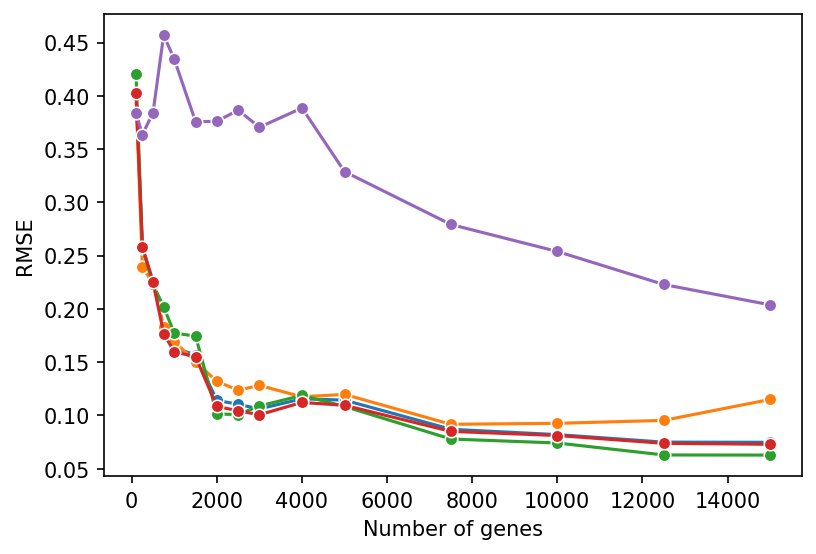

In [122]:
df = read("top_ngenes_xin")
plot(df, "rmse", "figures/ngenes/top_ngenes_xin.pdf")

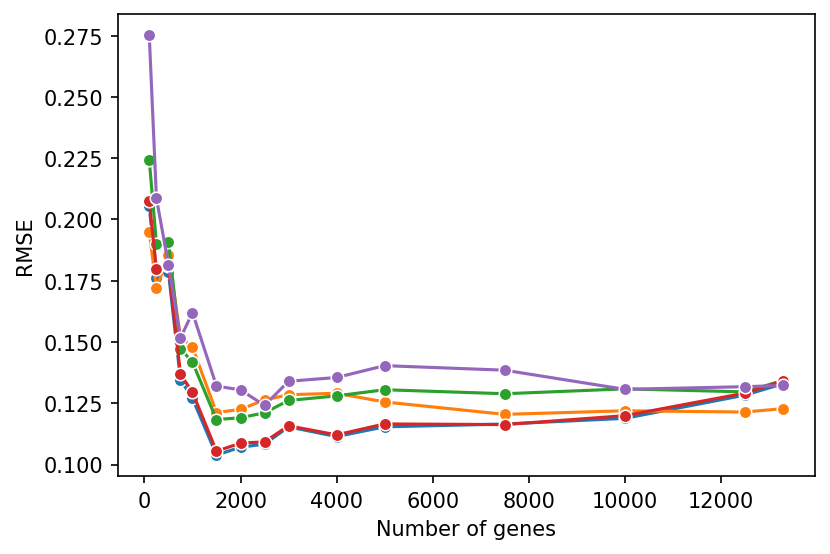

In [123]:
df = read("top_ngenes_pbmc")
plot(df, "rmse", "figures/ngenes/top_ngenes_pbmc.pdf")

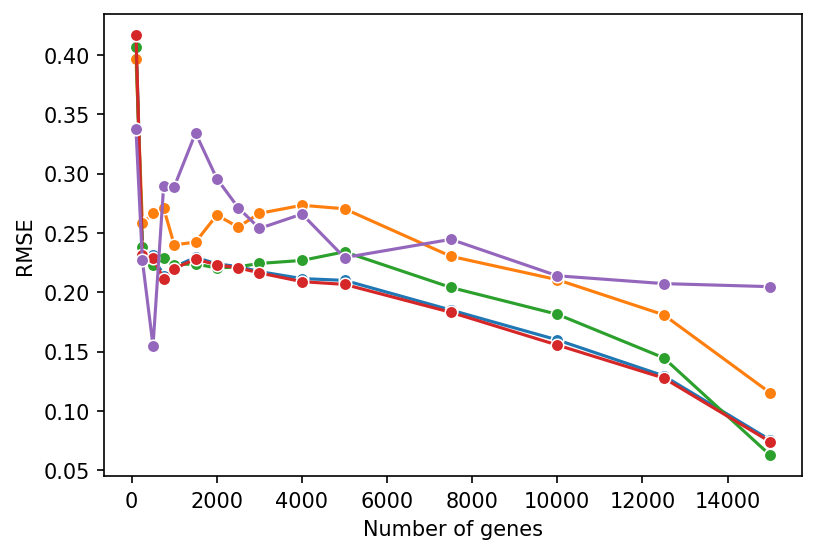

In [124]:
df = read("ngenes_xin")
plot(df, "rmse", "figures/ngenes/ngenes_xin.pdf")

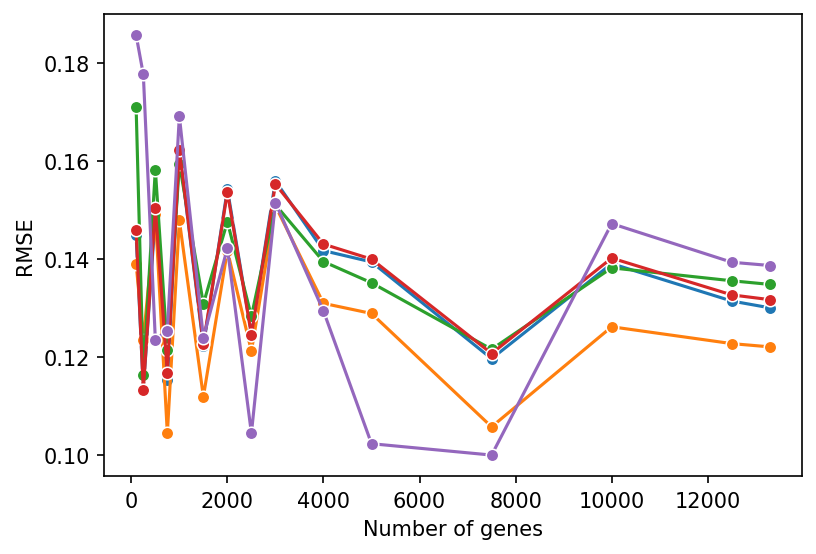

In [125]:
df = read("ngenes_pbmc")
plot(df, "rmse", "figures/ngenes/ngenes_pbmc.pdf")